In [2]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [3]:
train <- read.csv(file = '../../Data/training_data.csv')
train <- na.omit(train)
train.regr <- train[,-3]
train.regr$Intensity <- as.numeric(train.regr$Intensity)

test <- read.csv(file = '../../Data/test_data.csv')
test <- na.omit(test)
test <- test[,-1]
test$Intensity <- as.numeric(test$Intensity)

ZeroVar <- function(data) {
   out <- lapply(data, function(x) length(unique(x)))
   want <- which(!out > 1)
   unlist(want)
}

#Applying the ZeroVar function
train.zeroVar <- train.regr[,-ZeroVar(train.regr)]
x.full.ZV <- as.matrix(train.zeroVar[,-2])
x.test <- test[,-(ZeroVar(train.regr)-1)]
x.test <- as.matrix (x.test)


In [4]:
head(x.test)
head(x.full.ZV)

Intensity,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,Me,...,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
1,31.5,150.34,6.834,12.062,21.338,14.625,24.746,0.548,0.970,...,0,0,0,0,0,0,0,0,0,0
1,196.0,146.15,8.597,12.010,17.305,12.193,18.664,0.706,1.018,...,0,0,0,0,0,0,0,0,0,0
1,79.0,130.21,5.661,12.117,22.840,13.239,26.325,0.527,0.993,...,0,0,0,0,0,0,0,0,0,0
1,95.2,164.27,5.867,15.929,27.396,17.546,31.531,0.569,0.978,...,0,0,0,0,1,0,0,0,1,0
1,48.1,100.18,5.273,9.876,18.629,11.023,21.701,0.520,0.980,...,0,0,0,0,0,0,0,0,0,0
1,137.0,164.22,6.842,14.590,23.956,15.477,26.910,0.608,0.998,...,0,0,0,0,1,0,0,0,1,0


Intensity,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,Me,...,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
2,302.0,208.33,5.952,19.698,34.491,21.523,39.571,0.563,0.985,...,0,0,1,0,1,0,1,0,1,0
1,72.6,122.18,6.431,11.349,18.745,12.261,21.285,0.597,0.987,...,0,0,0,0,0,0,0,0,0,0
1,259.0,242.29,7.572,20.832,32.167,21.693,35.535,0.651,1.005,...,1,0,1,0,1,1,1,0,1,1
1,56.6,88.12,6.294,7.537,14.189,7.955,16.080,0.538,1.014,...,0,0,0,0,0,0,0,0,0,0
2,84.7,136.21,6.191,12.876,21.629,14.023,24.701,0.585,0.983,...,0,0,0,0,0,0,0,0,0,0
1,160.0,192.28,6.409,17.644,29.723,19.000,33.740,0.588,0.991,...,0,0,0,0,1,0,1,0,1,0


Here we want to CV the alpha parameter

In [21]:
A <- seq(0,1,by = 0.1)
CVM <- c()
for (alpha in A){ 
    est <- c()
    for (i in 1:5) {    
        L2.cv <- cv.glmnet(x.full.ZV, train[,2], alpha = alpha, nfolds = 10)
        #plot(L2.cv, main = paste("alpha = ",alpha))
        est <- append(est,min(L2.cv$cvm))
    }
    CVM <- append(CVM,mean(est))
}

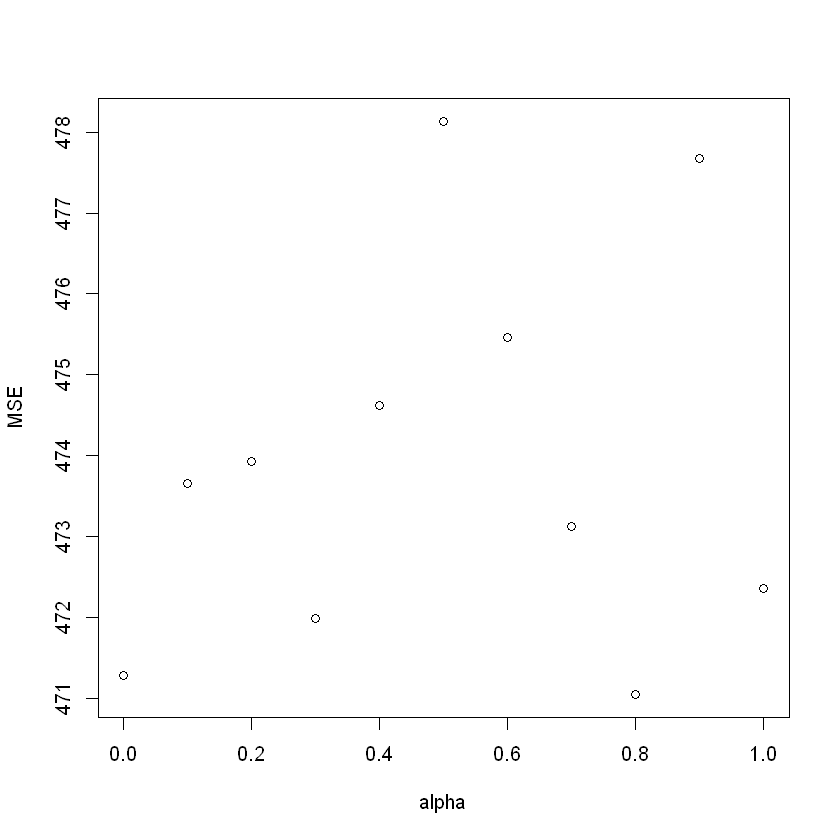

In [22]:
plot(A,CVM,xlab = 'alpha', ylab = 'MSE')

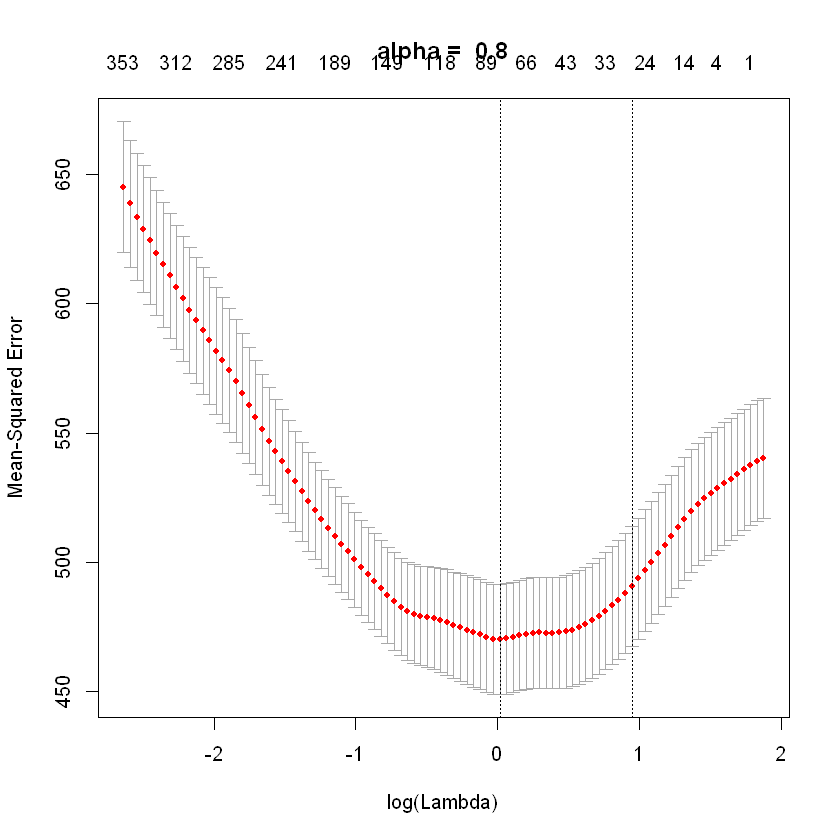

In [6]:
a = A[which.min(CVM)]
cv.best <- cv.glmnet(x.full.ZV, train[,2], alpha = a, nfolds = 10)
plot(cv.best, main = paste("alpha = ",a))

In [8]:
L.best <- glmnet(x.full.ZV,train.zeroVar[,2],alpha = 0.8, lambda = cv.best$lambda.min )
y.pred <- predict (L.best,x.test)

In [10]:
id <- 1:68
temps <- data.frame(y.pred)
final.data <- data.frame(Id = id,VALENCE.PLEASANTNESS = temps$s0)
write.csv(final.data,"../../Submission/GenR.csv",row.names = FALSE)